In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
model_df = pd.read_csv("sneakers2023.csv")


In [135]:

model_df.drop(["release","numberOfAsks","annualHigh","salesThisPeriod","lowestAsk","annualLow","volatility","pricePremium","lastSale","changePercentage"],axis=1, inplace=True)
model_df = model_df.drop(columns=model_df.columns[0])
model_df['Premium'] = model_df['averageDeadstockPrice'] - model_df['retail']
model_df['PremiumPercent'] = (model_df['Premium'] / model_df["retail"])*100

#Removing INF and NA's
model_df.replace([np.inf, -np.inf], np.nan, inplace=True)
model_df = model_df.dropna()
model_df['PremiumPercent'] = model_df['PremiumPercent'].astype('int64')

#Removes shoes with negative premium (losses)
final_df = model_df[model_df['PremiumPercent'] > 0]

#Re-arranging Columns
final_df = final_df.iloc[:, [0,1,2,6,7,8,5,3,4]]
final_df.drop(['highestBid', 'numberOfBids', 'deadstockSold'],axis=1, inplace=True)

#print(model_df.dtypes)
final_df.head(10)

,item,brand,retail,averageDeadstockPrice,Premium,PremiumPercent
0,Jordan 4 Retro SB Pine Green,Jordan,225,388,163,72
1,Jordan 3 Retro White Cement Reimagined,Jordan,210,297,87,41
2,Nike Air Force 1 Low Tiffany & Co. 1837,Nike,400,1160,760,190
3,Nike Air Max 1 '86 Big Bubble Sport Red,Nike,150,228,78,52
4,MSCHF Big Red Boot,MSCHF,350,883,533,152
5,New Balance 990v6 Action Bronson Baklava,New Balance,220,403,183,83
6,Nike Dunk Low Retro White Black Panda (2021),Nike,110,191,81,73
7,Nike Dunk Low Retro White Black Panda (2021) (...,Nike,100,179,79,79
8,Nike Dunk Low Grey Fog,Nike,100,216,116,115
9,Nike Dunk Low Retro White Black Panda (2021) (GS),Nike,85,162,77,90


In [136]:
num_distinct = final_df['brand'].nunique()
unique_values = final_df['brand'].unique()
brand_dict = {}
for x in unique_values:
    brand_dict[x] = final_df['brand'].value_counts().get(x, 0)
#print(unique_values)

{'Nike': 669, 'Jordan': 588, 'adidas': 199, 'New Balance': 125, 'Crocs': 18, 'Converse': 16, 'Puma': 14, 'UGG': 10, 'ASICS': 3, 'MSCHF': 2, 'Asics': 2, 'The North Face': 2, 'Under Armour': 2, 'Birkenstock': 1, 'Vans': 1, 'BAPE': 1}


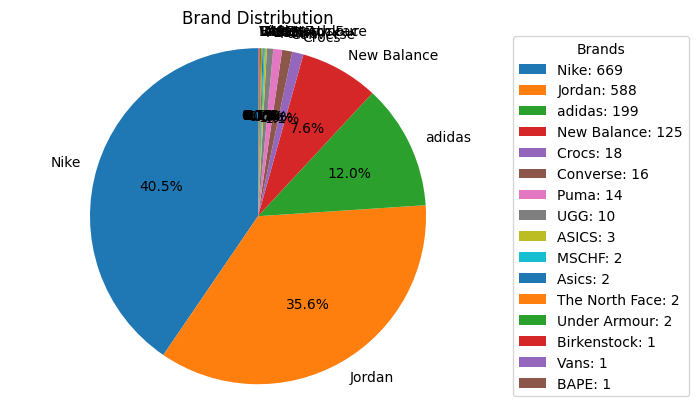

In [140]:
sorted_dict = dict(sorted(brand_dict.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict)
labels = sorted_dict.keys()
sizes = sorted_dict.values()


plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

legend_labels = [f'{label}: {value}' for label, value in sorted_dict.items()]
plt.legend(legend_labels, title="Brands", loc='center left',bbox_to_anchor=(1, 0.5),fontsize=10)
plt.axis('equal')  
plt.title('Brand Distribution')

plt.show()

In [120]:
final_df.describe()

,retail,averageDeadstockPrice,Premium,PremiumPercent
count,1653.000000,1653.000000,1653.000000,1653.000000
mean,137.943134,213.759831,75.816697,56.255293
std,47.363789,150.780134,135.574501,88.042831
min,40.000000,63.000000,1.000000,1.000000
25%,100.000000,143.000000,24.000000,18.000000
50%,120.000000,181.000000,44.000000,34.000000
75%,170.000000,240.000000,85.000000,67.000000
max,400.000000,2319.000000,2129.000000,1287.000000


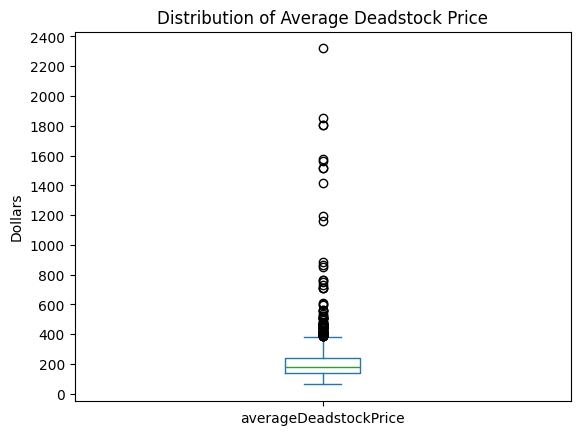

In [121]:
plot1 = final_df["averageDeadstockPrice"].plot.box()

# Show the plot
plt.title("Distribution of Average Deadstock Price")
plt.ylabel('Dollars')
plot1.yaxis.set_major_locator(MultipleLocator(200))
plt.show()

In [122]:
profit_df = final_df[['item','brand','retail', 'averageDeadstockPrice']]

In [123]:
profit_df['retail'] = profit_df['retail'] * 1.06
profit_df.rename(columns={'retail': 'cost'}, inplace=True)
processing_fee = profit_df['averageDeadstockPrice']*0.03
transaction_fee = profit_df['averageDeadstockPrice']* 0.09
revenue = profit_df['averageDeadstockPrice'] - transaction_fee - processing_fee
profit_df['Profit'] = (profit_df['averageDeadstockPrice'] - profit_df['cost'] - transaction_fee - processing_fee)
profit_df['Return On Cost'] = (profit_df['Profit']/profit_df['cost']).round(decimals=2)
profit_df["Profit Margin"] = (profit_df['Profit']/revenue).round(decimals=2)
profit_df.head(10)

/var/folders/41/f12m6hzs7m300kz_k3yn933c0000gn/T/ipykernel_823/2494451088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_df['retail'] = profit_df['retail'] * 1.06
/var/folders/41/f12m6hzs7m300kz_k3yn933c0000gn/T/ipykernel_823/2494451088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_df.rename(columns={'retail': 'cost'}, inplace=True)
/var/folders/41/f12m6hzs7m300kz_k3yn933c0000gn/T/ipykernel_823/2494451088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,item,brand,cost,averageDeadstockPrice,Profit,Return On Cost,Profit Margin
0,Jordan 4 Retro SB Pine Green,Jordan,238.5,388,102.94,0.43,0.30
1,Jordan 3 Retro White Cement Reimagined,Jordan,222.6,297,38.76,0.17,0.15
2,Nike Air Force 1 Low Tiffany & Co. 1837,Nike,424.0,1160,596.80,1.41,0.58
3,Nike Air Max 1 '86 Big Bubble Sport Red,Nike,159.0,228,41.64,0.26,0.21
4,MSCHF Big Red Boot,MSCHF,371.0,883,406.04,1.09,0.52
5,New Balance 990v6 Action Bronson Baklava,New Balance,233.2,403,121.44,0.52,0.34
6,Nike Dunk Low Retro White Black Panda (2021),Nike,116.6,191,51.48,0.44,0.31
7,Nike Dunk Low Retro White Black Panda (2021) (...,Nike,106.0,179,51.52,0.49,0.33
8,Nike Dunk Low Grey Fog,Nike,106.0,216,84.08,0.79,0.44
9,Nike Dunk Low Retro White Black Panda (2021) (GS),Nike,90.1,162,52.46,0.58,0.37


In [126]:
sorted_df = profit_df.sort_values(by='Profit Margin', ascending=False) 
sorted_df.head(5)

,item,brand,cost,averageDeadstockPrice,Profit,Return On Cost,Profit Margin
584,Jordan 1 Retro Low OG SP Travis Scott,Jordan,137.8,1804,1449.72,10.52,0.91
605,Jordan 1 Retro Low OG SP Travis Scott,Jordan,137.8,1803,1448.84,10.51,0.91
1947,Jordan 1 Retro High Off-White University Blue,Jordan,201.4,2319,1839.32,9.13,0.90
1746,Jordan 1 Retro High Travis Scott,Jordan,185.5,1855,1446.90,7.80,0.89
341,Jordan 1 Retro Low OG SP Fragment x Travis Scott,Jordan,159.0,1515,1174.20,7.38,0.88


In [127]:
df_cleaned = profit_df[~profit_df['item'].str.contains('Travis|Off-White|Slide', case=False, na=False)]
df_cleaned = df_cleaned.sort_values(by='Profit Margin', ascending=False) 
df_cleaned.head(15)

,item,brand,cost,averageDeadstockPrice,Profit,Return On Cost,Profit Margin
1003,NikeCraft General Purpose Shoe Tom Sachs,Nike,116.6,566,381.48,3.27,0.77
854,Jordan 4 Retro Black Cat (2020),Jordan,201.4,849,545.72,2.71,0.73
1745,Nike Dunk Low Medium Curry,Nike,116.6,471,297.88,2.55,0.72
1423,Nike SB Dunk Low Mummy,Nike,116.6,459,287.32,2.46,0.71
129,Nike SB Dunk Low Concepts Orange Lobster,Nike,127.2,506,318.08,2.50,0.71
1978,adidas Yeezy Foam RNNR MX Cream Clay,adidas,84.8,328,203.84,2.40,0.71
1865,Nike SB Dunk High Strawberry Cough (Regular Box),Nike,116.6,444,274.12,2.35,0.70
1393,Nike Kobe 6 Protro Mambacita Sweet 16,Nike,190.8,712,435.76,2.28,0.70
1666,Jordan 4 Retro Black Cat (2020),Jordan,201.4,764,470.92,2.34,0.70
324,Nike Dunk Low UNC (2021),Nike,106.0,397,243.36,2.30,0.70
